# STUDENT PERFORMANCE DATA SET PROJECT

# IMPORTING LIBRARIES

In [90]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
df2 = pd.read_csv("../data/matPP.csv", sep=',')
df2

Unnamed: 0  school  sex  age  address  famsize  Pstatus  Medu  Fedu  \
0             0       0    0   18        1        0        0     4   4.0   
1             1       0    0   17        1        0        1     1   1.0   
2             2       0    0   15        1        1        1     1   1.0   
3             3       0    0   15        1        0        1     4   2.0   
4             4       0    0   16        1        0        1     3   3.0   
..          ...     ...  ...  ...      ...      ...      ...   ...   ...   
390         390       1    1   20        1        1        0     2   2.0   
391         391       1    1   17        1        1        1     3   1.0   
392         392       1    1   21        0        0        1     1   1.0   
393         393       1    1   18        0        1        1     3   2.0   
394         394       1    1   19        1        1        1     1   1.0   

     traveltime  ...  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
0           2.0  ...              0             0             0            0   
1           1.0  ...              0             0             0            0   
2           1.0  ...              0             0             0            0   
3           1.0  ...              0             0             0            0   
4           1.0  ...              0             0             0            0   
..          ...  ...            ...           ...           ...          ...   
390         1.0  ...              1             0             0            0   
391         2.0  ...              1             0             0            0   
392         1.0  ...              0             0             0            0   
393         3.0  ...              1             0             0            0   
394         1.0  ...              0             0             1            0   

     Fjob_other  Fjob_services  Fjob_teacher  guardian_father  \
0             0              0             1                0   
1             1              0             0                1   
2             1              0             0                0   
3             0              1             0                0   
4             1              0             0                1   
..          ...            ...           ...              ...   
390           0              1             0                0   
391           0              1             0                0   
392           1              0             0                0   
393           1              0             0                0   
394           0              0             0                1   

     guardian_mother  guardian_other  
0                  1               0  
1                  0               0  
2                  1               0  
3                  1               0  
4                  0               0  
..               ...             ...  
390                0               1  
391                1               0  
392                0               1  
393                1               0  
394                0               0  

[395 rows x 48 columns]

# Correlation

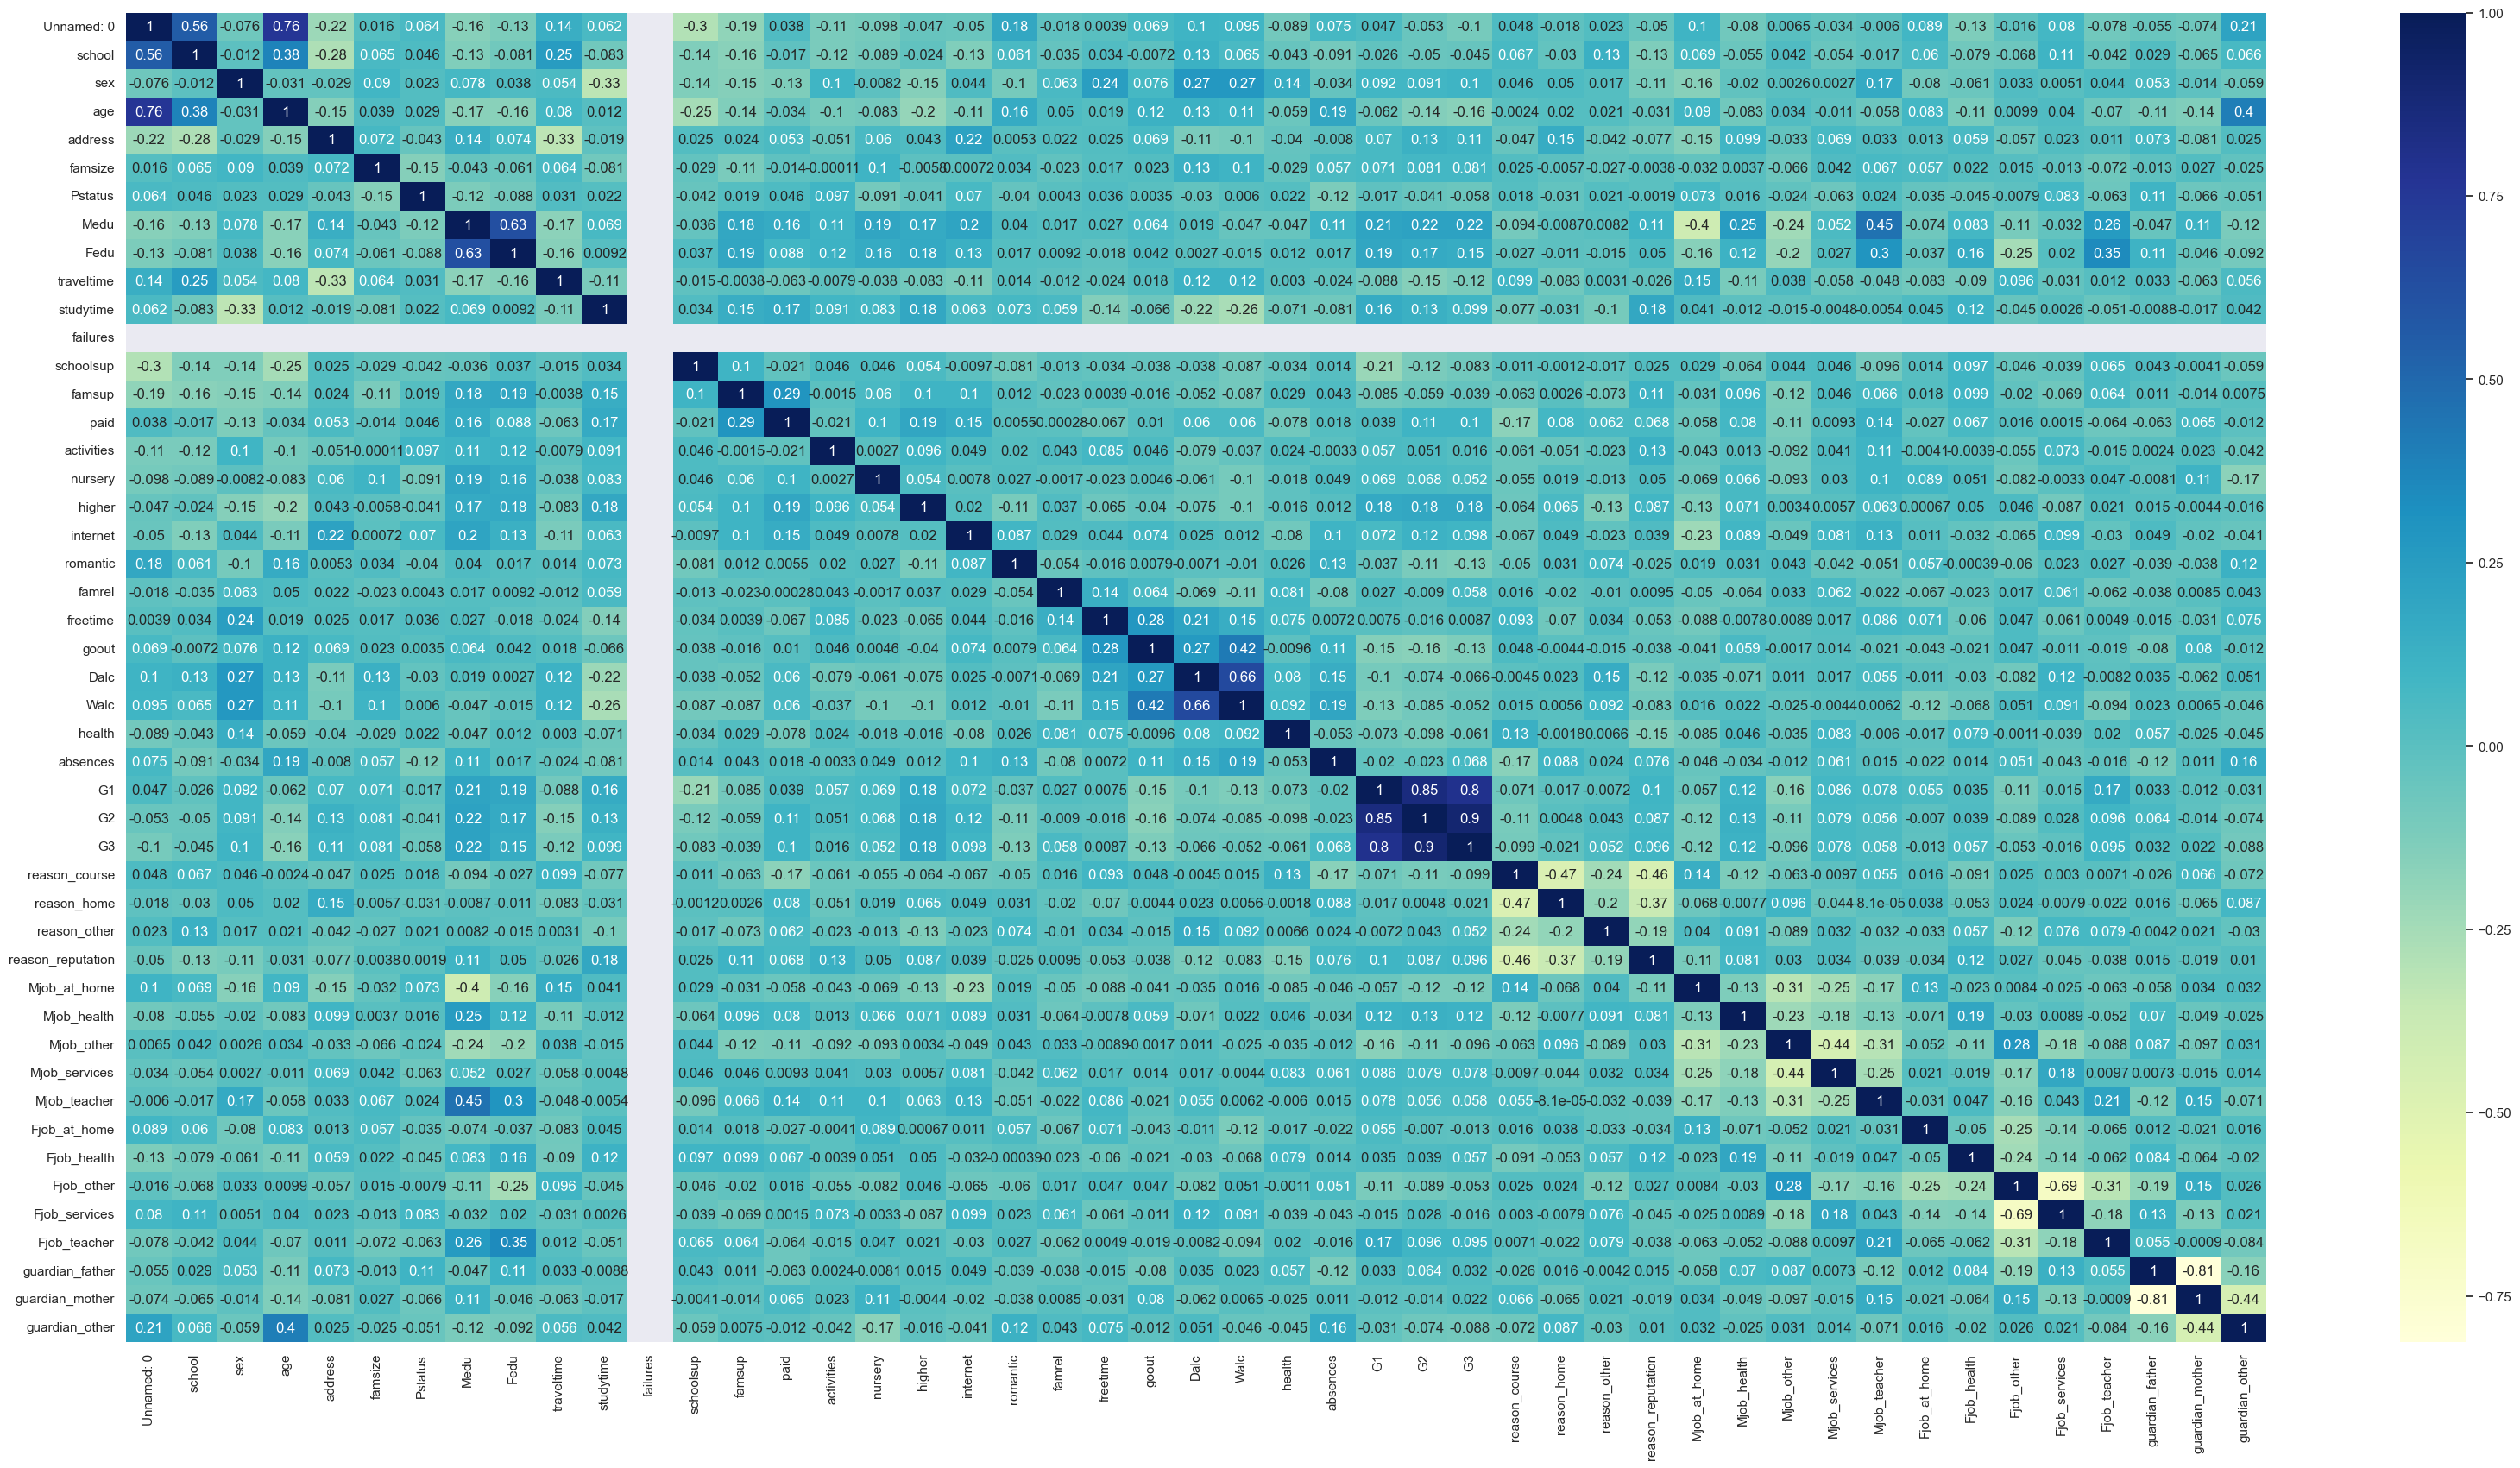

In [59]:
plt.figure(figsize=(40,20))
sns.heatmap(df2.corr(), annot = True, cmap = "YlGnBu")
plt.show()

# ALGORITHMS

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [61]:
y = df2["letter_grade"]
x = df2.drop(["letter_grade"], axis=1)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    stratify=y)
#70% train and 30% test

In [63]:
x_test 

Unnamed: 0  school  sex  age  address  famsize  Pstatus  Medu  Fedu  \
168         168       0    0   16        1        0        1     2   2.0   
219         219       0    0   17        1        0        1     2   2.0   
280         280       0    1   17        1        1        0     4   1.0   
171         171       0    1   16        1        0        1     1   0.5   
243         243       0    1   16        1        0        1     4   4.0   
..          ...     ...  ...  ...      ...      ...      ...   ...   ...   
294         294       0    1   18        0        1        1     3   2.0   
287         287       0    0   17        1        0        1     1   1.0   
215         215       0    0   17        1        1        1     3   2.0   
374         374       1    0   18        0        1        1     4   4.0   
223         223       0    1   18        1        0        1     2   2.0   

     traveltime  ...  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
168         1.0  ...              0             0             0            0   
219         1.0  ...              0             0             1            0   
280         2.0  ...              1             0             0            0   
171         2.0  ...              0             0             0            0   
243         1.0  ...              1             0             0            0   
..          ...  ...            ...           ...           ...          ...   
294         2.0  ...              1             0             0            0   
287         1.0  ...              1             0             0            0   
215         2.0  ...              0             0             0            0   
374         2.0  ...              0             0             0            0   
223         2.0  ...              0             0             0            0   

     Fjob_other  Fjob_services  Fjob_teacher  guardian_father  \
168           1              0             0                0   
219           0              0             0                0   
280           1              0             0                0   
171           1              0             0                0   
243           0              1             0                0   
..          ...            ...           ...              ...   
294           1              0             0                0   
287           0              0             1                0   
215           1              0             0                0   
374           1              0             0                0   
223           1              0             0                0   

     guardian_mother  guardian_other  
168                1               0  
219                1               0  
280                1               0  
171                1               0  
243                1               0  
..               ...             ...  
294                1               0  
287                1               0  
215                1               0  
374                1               0  
223                1               0  

[119 rows x 47 columns]

# 1. Naive Bayes

In [64]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

In [65]:
nb_model.predict(x_test)[0:119]

array(['D', 'B', 'C', 'A', 'B', 'B', 'C', 'B', 'B', 'A', 'C', 'C', 'B',
       'C', 'B', 'C', 'A', 'D', 'A', 'A', 'B', 'D', 'A', 'B', 'B', 'C',
       'A', 'B', 'C', 'C', 'C', 'C', 'B', 'C', 'B', 'B', 'C', 'B', 'C',
       'C', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'C', 'B', 'B', 'B',
       'B', 'A', 'B', 'C', 'A', 'C', 'D', 'A', 'C', 'C', 'A', 'A', 'C',
       'C', 'B', 'A', 'A', 'B', 'B', 'C', 'A', 'D', 'B', 'B', 'D', 'C',
       'A', 'B', 'B', 'B', 'D', 'B', 'A', 'D', 'C', 'D', 'A', 'B', 'C',
       'C', 'C', 'A', 'A', 'D', 'C', 'B', 'B', 'A', 'B', 'A', 'C', 'A',
       'B', 'B', 'B', 'B', 'A', 'B', 'D', 'A', 'B', 'B', 'A', 'A', 'A',
       'A', 'B'], dtype='<U1')

In [66]:
y_pred = nb_model.predict(x_test)

In [67]:
accuracy_score(y_test, y_pred)

0.865546218487395

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.71      1.00      0.83        22
           B       0.96      0.78      0.86        58
           C       0.83      0.93      0.88        27
           D       1.00      0.92      0.96        12

    accuracy                           0.87       119
   macro avg       0.88      0.90      0.88       119
weighted avg       0.89      0.87      0.87       119



# 2. KNN 

### KNN Model Tuning

In [69]:
knn_params = {"n_neighbors": np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [70]:
print("Best score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best score:0.6701298701298701
Best Parameters: {'n_neighbors': 1}


In [71]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(x_train, y_train)

In [72]:
knn_tuned.score(x_test, y_test)

0.7478991596638656

In [73]:
y_pred = knn_tuned.predict(x_test)

In [74]:
accuracy_score(y_test, y_pred)

0.7478991596638656

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.79      0.68      0.73        22
           B       0.75      0.74      0.75        58
           C       0.62      0.74      0.68        27
           D       1.00      0.92      0.96        12

    accuracy                           0.75       119
   macro avg       0.79      0.77      0.78       119
weighted avg       0.76      0.75      0.75       119



# 3. SVM 

### SVM Model Tuning

In [76]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 5, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [77]:
print("Best Parameter: " + str(svc_cv_model.best_params_))

Best Parameter: {'C': 1}


In [78]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(x_train, y_train)

In [79]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9663865546218487

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.82      0.90        22
           B       0.94      1.00      0.97        58
           C       1.00      1.00      1.00        27
           D       1.00      1.00      1.00        12

    accuracy                           0.97       119
   macro avg       0.98      0.95      0.97       119
weighted avg       0.97      0.97      0.97       119



# 4. Random Forest

### Random Forest Model Tuning

In [42]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [43]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

In [81]:
rf_cv_model.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [82]:
print("Best Parameter: " + str(rf_cv_model.best_params_))

Best Parameter: {'max_depth': 5, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 1000}


In [83]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 8, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=8, min_samples_split=5,
                       n_estimators=1000)

In [84]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.957983193277311

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.82      0.90        22
           B       0.94      1.00      0.97        58
           C       0.96      1.00      0.98        27
           D       1.00      0.92      0.96        12

    accuracy                           0.96       119
   macro avg       0.97      0.93      0.95       119
weighted avg       0.96      0.96      0.96       119



In [86]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)

Text(0.5, 0, 'Varaibles Severity Level')

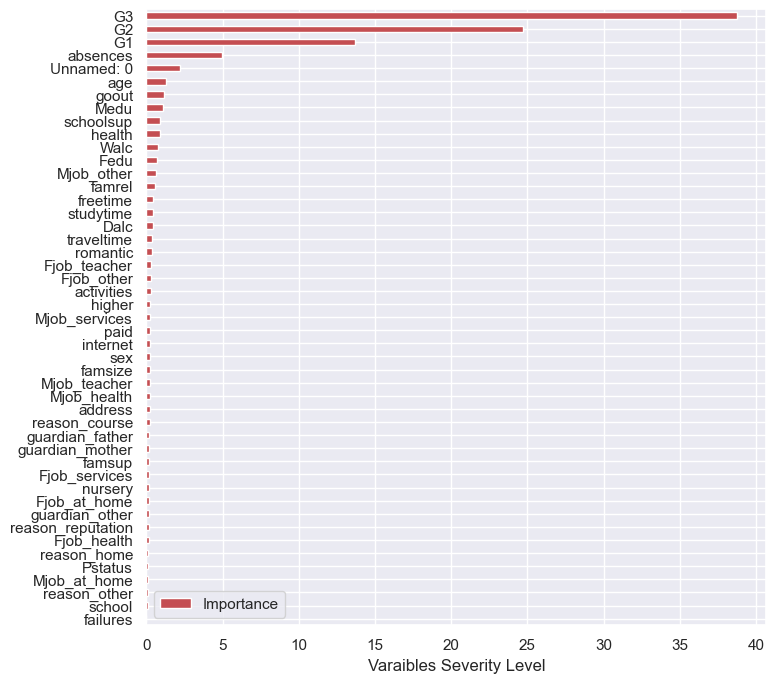

In [87]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r",figsize=(8,8))

plt.xlabel("Varaibles Severity Level")

# COMPARISON

In [88]:
Models = [
    knn_tuned,
    nb_model,
    svc_tuned,
    rf_tuned]

for model in Models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))

----------------------------
KNeighborsClassifier:
Accuracy: 74.7899%
----------------------------
GaussianNB:
Accuracy: 86.5546%
----------------------------
SVC:
Accuracy: 96.6387%
----------------------------
RandomForestClassifier:
Accuracy: 95.7983%


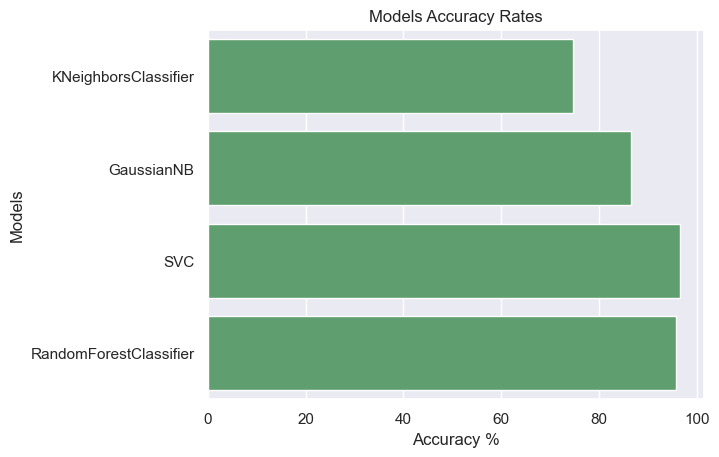

In [89]:
conclusion = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in Models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)    
    conclusion = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(conclusion)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="g")
plt.xlabel('Accuracy %')
plt.title('Models Accuracy Rates');    

In [91]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost only

In [92]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1)
ada_model = ada.fit(x_train, y_train)

y_pred = ada_model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        22
           B       1.00      1.00      1.00        58
           C       1.00      1.00      1.00        27
           D       1.00      1.00      1.00        12

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



# AdaBoost after RF

In [95]:
adarf = AdaBoostClassifier(n_estimators=100, base_estimator=rf_tuned, learning_rate=1)
adarf_model = adarf.fit(x_train, y_train)

y_pred = adarf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9663865546218487

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.82      0.90        22
           B       0.94      1.00      0.97        58
           C       1.00      1.00      1.00        27
           D       1.00      1.00      1.00        12

    accuracy                           0.97       119
   macro avg       0.98      0.95      0.97       119
weighted avg       0.97      0.97      0.97       119



# AdaBoost after Naive Bayes

In [97]:
adanb = AdaBoostClassifier(n_estimators=100, base_estimator=nb_model , learning_rate=1)
adanb_model = adanb.fit(x_train, y_train)

y_pred = adanb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.5126050420168067

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.67      0.18      0.29        22
           B       0.56      0.76      0.64        58
           C       0.36      0.44      0.40        27
           D       1.00      0.08      0.15        12

    accuracy                           0.51       119
   macro avg       0.65      0.37      0.37       119
weighted avg       0.58      0.51      0.47       119



# COMPARISON - II

In [104]:
Models = [
    adarf_model,
    adanb_model,
    ada_model]
name = ['AdaBoost after Random Forest', 'AdaBoost after Naive Bayes',"AdaBoost only"]
i=0
for model in Models:
    names = name[i]
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))
    i=i+1

----------------------------
AdaBoost after Random Forest:
Accuracy: 96.6387%
----------------------------
AdaBoost after Naive Bayes:
Accuracy: 51.2605%
----------------------------
AdaBoost only:
Accuracy: 100.0000%


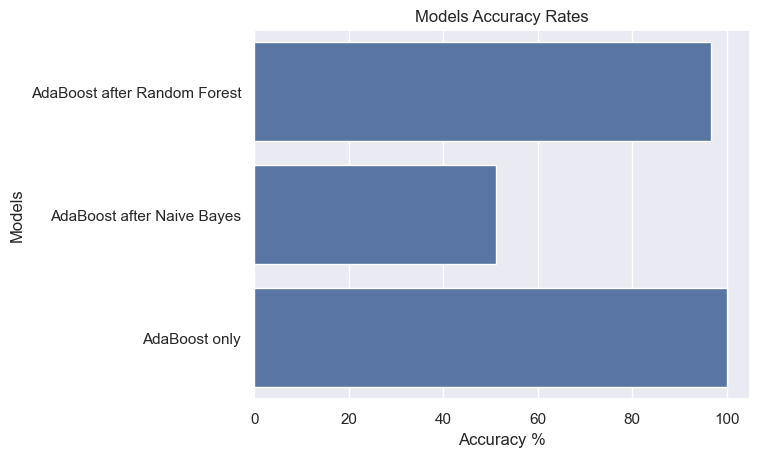

In [105]:
conclusion = []

results = pd.DataFrame(columns= ["Models","Accuracy"])
i=0
for model in Models:
    names = name[i]
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)    
    conclusion = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(conclusion)
    i=i+1
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="b")
plt.xlabel('Accuracy %')
plt.title('Models Accuracy Rates');  